In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from datetime import date, timedelta
import pickle

In [24]:
# Read date of last data-download


f = open("data_date.dat", 'rb')
date_str=pickle.load(f)
f.close()

print("Dataset is from: " + date_str)

#define the file to read
datafolder=Path("data/")
datafile=datafolder / "Test_pos_over_time.csv"
df=pd.read_csv(datafile,  sep=';', parse_dates=['Date'], index_col=['Date'],error_bad_lines=False, engine='python', skipfooter=2, decimal=',', thousands='.')

Dataset is from: 15012021


In [9]:
#define the file to read


In [40]:
# Read datafile
# Skips last two lines (which does not convert to date) and converts index to date
# Notice handeling of danish format of the numbers (both decimal and thousands)
datafile="hele-landet-december-2020.csv"
df_temp=pd.read_csv(datafile, parse_dates=['DateTime'], index_col=['DateTime'],quotechar='"', sep=';',error_bad_lines=False, engine='python', decimal=',', thousands='.', encoding = 'utf8')

datafile="hele-landet-november-2020.csv"
x=pd.read_csv(datafile, parse_dates=['DateTime'], index_col=['DateTime'],quotechar='"', sep=';',error_bad_lines=False, engine='python', decimal=',', thousands='.', encoding = 'utf8')
df_temp=df_temp.append(x)

datafile="hele-landet-januar-2021.csv"
x=pd.read_csv(datafile, parse_dates=['DateTime'], index_col=['DateTime'],quotechar='"', sep=';',error_bad_lines=False, engine='python', decimal=',', thousands='.', encoding = 'utf8')
df_temp=df_temp.append(x)



In [41]:
df_temp

,Laveste,Højeste,Middel
DateTime,,,
2020-12-01,1.1,7.2,3.8
2020-12-02,1.0,6.4,3.7
2020-12-03,-0.6,5.7,1.8
2020-12-04,-1.2,6.7,2.7
2020-12-05,-0.4,8.9,4.2
...,...,...,...
2021-01-27,NaN,NaN,NaN
2021-01-28,NaN,NaN,NaN
2021-01-29,NaN,NaN,NaN


In [42]:
merge=pd.merge(df,df_temp, how='inner', left_index=True, right_index=True)

In [43]:
merge

,NewPositive,NotPrevPos,PosPct,PrevPos,Tested,Tested_kumulativ,Laveste,Højeste,Middel
2020-11-01,960,51286,1.9,451,51737,5359969,8.6,14.4,11.6
2020-11-02,1272,69162,1.8,716,69878,5429847,8.6,17.7,14.0
2020-11-03,1261,72849,1.7,725,73574,5503421,4.0,13.7,9.6
2020-11-04,1244,70583,1.8,709,71292,5574713,4.6,13.1,8.5
2020-11-05,1033,70317,1.5,786,71103,5645816,5.1,12.9,10.1
...,...,...,...,...,...,...,...,...,...
2021-01-11,1353,79963,1.7,1965,81928,11328268,-2.1,7.0,4.2
2021-01-12,1243,83550,1.5,1919,85469,11413737,-2.4,7.1,1.5
2021-01-13,1103,75329,1.5,1733,77062,11490799,-1.7,5.7,1.1
2021-01-14,298,22730,1.3,521,23251,11514050,-3.7,4.1,-0.6


<IPython.core.display.Javascript object>


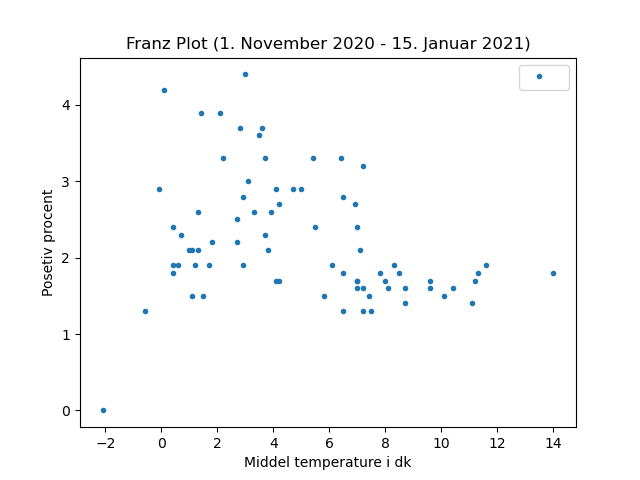

In [45]:
ax=merge.plot(x='Middel', y='PosPct',title='Franz Plot (1. November 2020 - 15. Januar 2021)', style='.',label='');
ax.set_ylabel("Posetiv procent");
ax.set_xlabel("Middel temperature i dk");
